Allison Forte

September 3, 2022

DSC 630

Assignment 1.2: R/Python Refresher

# Find a data set that interests you and has appropriate data to create some interesting visualizations. 
Comment all your code documenting your steps, process, and analysis.

## Write a summary of your data and identify at least two questions to explore visually with your data.

The data I am using is related to board games and their ratings. The data comes from Kaggle, specifically, from CAESURIC at https://www.kaggle.com/datasets/caesuric/bgggamesdata?select=basic_data.csv. 

The data scrapped from the BoardGameGeek XML API is several years old. It was acquired prior to July 15, 2020. This particular data set has several CSV files within it but the one I will be exploring is the basic data CSV. 

The basic data CSV has the basic stats on the the board games in the database at the time the data was scrapped. Given new games have been published since 2020, this data set would be larger today. 

Within the basic data CSV, there are 272,981 unique games listed, each with 21 attributes. This data will be a good starting point to explore the relationship between rating and bayes_rating to see how often they align, as well as to explore the player count and weight of the game compared to their rating. 

With this assignment I will look at the rating compared to the bayes_rating. Comparing histograms of each field will show differences in them. Is the rating or the bayes_rating generally higher?

I will also look at a comparison of minimum players compared to averageweight, maximum players compared to averageweight, and averageweight compared to rating. Are games with a higher player count less complex? Do users prefer heavy weight or lightweight games?

It would also be interesting to see how the user rating compared to the play time. Do users of the site rate longer games better or worse than shorter games?

These questions represent a few topics that can be explored with this data set but do not capture everything that could be discovered. 

In [58]:
# Load the data

import pandas as pd

df = pd.read_csv('/Users/allison.forte/Downloads/archive (1)/bgg_games_data/basic_data.csv')


# Check the shape of the data and view the first few rows of data

print('The shape of the dataframe is', df.shape)
df.head(3)

The shape of the dataframe is (286186, 22)


,name,description,thumbnail,image,rating,bayes_rating,usersrated,bggrank,stddev,owned,...,wishing,numweights,averageweight,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,age
0,Die Macher,Die Macher is a game about seven sequential po...,NaN,NaN,7.62855,7.14730,5054,262,1.58914,6855,...,1960,750,4.3347,1986.0,3.0,5.0,240.0,240.0,240.0,14.0
1,Dragonmaster,Dragonmaster is a trick-taking card game based...,NaN,NaN,6.61412,5.80514,545,3473,1.44458,1236,...,175,54,1.9630,1981.0,3.0,4.0,30.0,30.0,30.0,12.0
2,Samurai,Samurai is set in medieval Japan. Players comp...,NaN,NaN,7.44438,7.24579,14332,200,1.18342,14756,...,3170,1432,2.4916,1998.0,2.0,4.0,60.0,30.0,60.0,10.0


In [59]:
# Remove rows of data where the game is not ranked by BGG

df = df[df['bggrank'] != 'Not Ranked']


# Find shape and view the first few rows of data again

print('The shape of the dataframe is', df.shape)
df.head(3)

The shape of the dataframe is (19157, 22)


,name,description,thumbnail,image,rating,bayes_rating,usersrated,bggrank,stddev,owned,...,wishing,numweights,averageweight,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,age
0,Die Macher,Die Macher is a game about seven sequential po...,NaN,NaN,7.62855,7.14730,5054,262,1.58914,6855,...,1960,750,4.3347,1986.0,3.0,5.0,240.0,240.0,240.0,14.0
1,Dragonmaster,Dragonmaster is a trick-taking card game based...,NaN,NaN,6.61412,5.80514,545,3473,1.44458,1236,...,175,54,1.9630,1981.0,3.0,4.0,30.0,30.0,30.0,12.0
2,Samurai,Samurai is set in medieval Japan. Players comp...,NaN,NaN,7.44438,7.24579,14332,200,1.18342,14756,...,3170,1432,2.4916,1998.0,2.0,4.0,60.0,30.0,60.0,10.0


## Create a histogram or bar graph from your data.

Text(0, 0.5, 'Number of games')

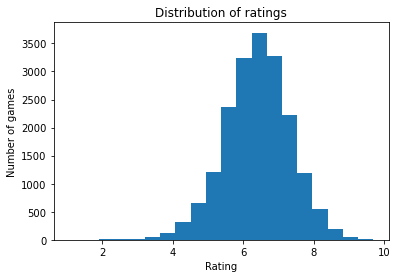

In [60]:
# Import matplot

import matplotlib.pyplot as plt


# Create a histogram of the game ratings showing 20 buckets for the 0-10 score

df.rating.hist(grid = False, bins = 20, rwidth = 1)
plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Number of games')

Text(0, 0.5, 'Number of games')

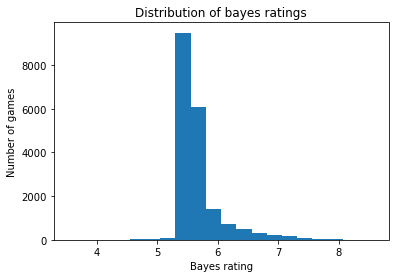

In [61]:
# Look at the same graph for the 'Bayes rating' instead of the 'rating'

df.bayes_rating.hist(grid = False, bins = 20, rwidth = 1)
plt.title('Distribution of bayes ratings')
plt.xlabel('Bayes rating')
plt.ylabel('Number of games')

## Create a boxplot from your data.

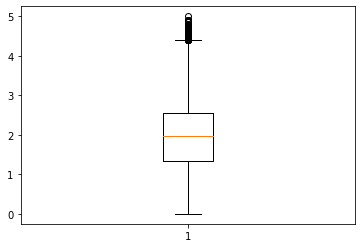

In [62]:
# Use a boxplot to look at the averageweight distribution

plt.boxplot(df.averageweight)
plt.show()

## Create a bivariate plot from your data.

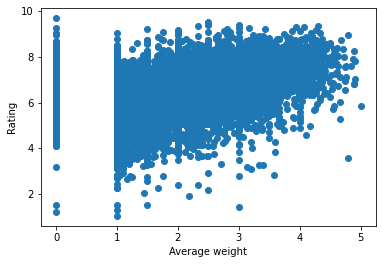

In [65]:
# Compare averageweight to rating

plt.scatter(df['averageweight'], df['rating'])
plt.xlabel('Average weight')
plt.ylabel('Rating')
plt.show()

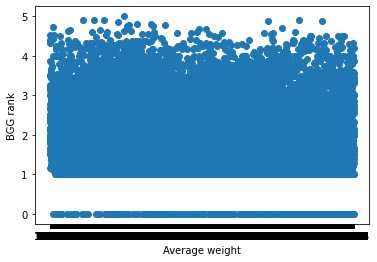

In [66]:
# Compare bggrank to averageweight

plt.scatter(df['bggrank'], df['averageweight'])
plt.xlabel('Average weight')
plt.ylabel('BGG rank')
plt.show()

## Create any additional visualizations that will help to answer the question(s) you want to answer.

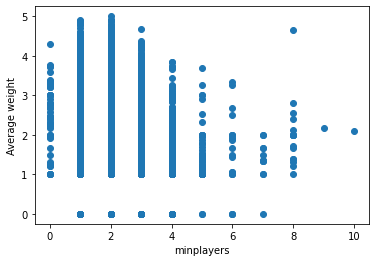

In [67]:
# Plot min player count compared to average weight

plt.scatter(df['minplayers'], df['averageweight'])
plt.xlabel('minplayers')
plt.ylabel('Average weight')
plt.show()

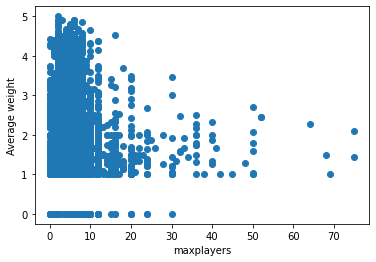

In [68]:
# Filter data to avoid extremely high player count of roll-and-wright style games and internet based games

df2 = df[df['maxplayers'] < 99]


# Plot max player count compared to average weight

plt.scatter(df2['maxplayers'], df2['averageweight'])
plt.xlabel('maxplayers')
plt.ylabel('Average weight')
plt.show()

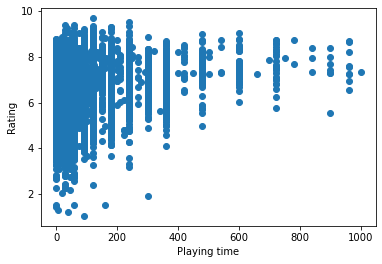

In [69]:
# Filter data to avoid extremely long playtimes that are outliers to this dataset

df3 = df[df['playingtime'] < 1000]


# Plot playingtime compared to rating

plt.scatter(df3['playingtime'], df3['rating'])
plt.xlabel('Playing time')
plt.ylabel('Rating')
plt.show()

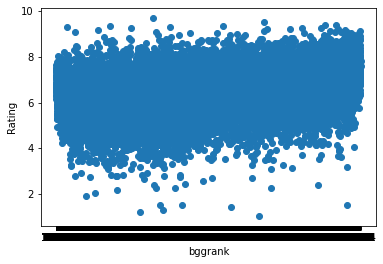

In [70]:
# Plot bggrank compared to rating

plt.scatter(df['bggrank'], df['rating'])
plt.xlabel('bggrank')
plt.ylabel('Rating')
plt.show()

## Summarize your results and make a conclusion. Explain how you arrived at this conclusion and how your visualizations support your conclusion.

With the visualizations above, we can return to the original questions. 

First, we wanted to see whether the Bayes rating was similar to or different from the rating. We can see from the histograms of each variable, they are in fact different. They have different distributions and different centers. 

The boxplot of averageweight gives an idea for the spread of weights. It shows that the average averageweight rating is about 2 with common ratings extending from 0 to 4.5. Ratings above 4.5 are outliers. It is important to note that all averageweight measures are on a scale of 0-5.

Several additional bivatiate plots were created to visualize relationships in the data. First, averageweight vs rating was viewed and compared to bggrank vs average weight. We can see that in general, heavier weighted games are ranked higher. Players on BGG tend to rate more complex games higher indicating that they may like them more. 

The game weight does not have a strong relationship to the bggrank. This indicates that the BGG rank is not based heavily on the weight of a game but rather on other factors. 

Next, we visualized minplayers vs averageweight as well as maxplayers vs average weight. As one would expect, game complexity dropped when the player count was higher. In general, when you play a game with more people, it needs to be simpler and less complex.

Looking at playingtime vs rating, we can see that in general, as games get longer, the rating increases. This effect does level off so it is not a linear relationship.

I decided to also look at BGGrank compared to rating to see if there was a noticeable relationship. I was surprised to see that lower ranked games (games with a higher rank number) actually tended to have higher ratings. This was counter to what I was expecting. 

Overall, there is quite a bit of information that can be discovered from this dataset. However, it is important to note that the data is 2+ years old and so does not account for recent changes. Also, This data is taken from one website with a specific group of users who rate the games. It likely does not account for all views of certain games.